<a href="https://colab.research.google.com/github/tantiboro/whatweeatinamerica/blob/main/wweia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import string
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading the dataset
df = pd.read_excel('/content/drive/MyDrive/New Folder/dataset/2019-2020 FNDDS At A Glance - FNDDS Ingredients.xlsx', skiprows=1)

In [4]:
df.head(2)

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),...,Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,2.009,1.658,0.497,14,60,61,0,7,0,0,0,0.014,0.036,0.177,0.011,...,51,17,0,0,0.0,0.000,0.000,0.000,0.063,0.256,0.321,0.919,0.293,0.129,1.475,0.040,0.0,0.374,0.052,0.0,0.026,0.0,0.000,0.0,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,1.249,0.458,0.070,9,57,58,0,4,0,0,0,0.057,0.137,0.110,0.061,...,156,39,0,0,0.0,0.046,0.036,0.023,0.056,0.065,0.204,0.576,0.208,0.032,0.465,0.002,0.0,0.074,0.008,0.0,0.003,0.0,0.001,0.0,88.92


In [59]:
dfa = df.copy()

In [60]:
dfa.head(2)

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),...,Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,2.009,1.658,0.497,14,60,61,0,7,0,0,0,0.014,0.036,0.177,0.011,...,51,17,0,0,0.0,0.000,0.000,0.000,0.063,0.256,0.321,0.919,0.293,0.129,1.475,0.040,0.0,0.374,0.052,0.0,0.026,0.0,0.000,0.0,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,1.249,0.458,0.070,9,57,58,0,4,0,0,0,0.057,0.137,0.110,0.061,...,156,39,0,0,0.0,0.046,0.036,0.023,0.056,0.065,0.204,0.576,0.208,0.032,0.465,0.002,0.0,0.074,0.008,0.0,0.003,0.0,0.001,0.0,88.92


In [61]:
dfa = dfa.drop(dfa.iloc[:, -20:-1], axis=1)

In [62]:
print(*dfa.columns)

Food code Main food description WWEIA Category number WWEIA Category description Energy (kcal) Protein (g) Carbohydrate (g) Sugars, total
(g) Fiber, total dietary (g) Total Fat (g) Fatty acids, total saturated (g) Fatty acids, total monounsaturated (g) Fatty acids, total polyunsaturated (g) Cholesterol (mg) Retinol (mcg) Vitamin A, RAE (mcg_RAE) Carotene, alpha (mcg) Carotene, beta (mcg) Cryptoxanthin, beta (mcg) Lycopene (mcg) Lutein + zeaxanthin (mcg) Thiamin (mg) Riboflavin (mg) Niacin (mg) Vitamin B-6 (mg) Folic acid (mcg) Folate, food (mcg) Folate, DFE (mcg_DFE) Folate, total (mcg) Choline, total (mg) Vitamin B-12 (mcg) Vitamin B-12, added
(mcg) Vitamin C (mg) Vitamin D (D2 + D3) (mcg) Vitamin E (alpha-tocopherol) (mg) Vitamin E, added
(mg) Vitamin K (phylloquinone) (mcg) Calcium (mg) Phosphorus (mg) Magnesium (mg) Iron
(mg) Zinc
(mg) Copper (mg) Selenium (mcg) Potassium (mg) Sodium (mg) Caffeine (mg) Theobromine (mg) Alcohol (g) Water
(g)


In [63]:
def clean_column_name(df):
  """ return lower case columns names """
  df.columns = df.columns.str.lower().str.replace(r'\r+|\n+|\t+','', regex=True)
  """ return columns after removing special charracters"""
  for char in string.punctuation:
    df.columns = df.columns.str.replace(char, '', regex=True)
  """ return columns after removing white spaces"""
  df.columns = df.columns.str.replace(' ', '_')
  return df



In [64]:
dfa = clean_column_name(dfa)

In [11]:
# dfa.columns = dfa.columns.str.lower()

In [12]:
# import string
# for char in string.punctuation:
#   dfa.columns = dfa.columns.str.replace(char, '', regex=True)


In [13]:
# dfa.columns = dfa.columns.str.replace(r'\r+|\n+|\t+','', regex=True)

In [65]:
print(*dfa.columns)

food_code main_food_description wweia_category_number wweia_category_description energy_kcal protein_g carbohydrate_g sugars_totalg fiber_total_dietary_g total_fat_g fatty_acids_total_saturated_g fatty_acids_total_monounsaturated_g fatty_acids_total_polyunsaturated_g cholesterol_mg retinol_mcg vitamin_a_rae_mcgrae carotene_alpha_mcg carotene_beta_mcg cryptoxanthin_beta_mcg lycopene_mcg lutein__zeaxanthin_mcg thiamin_mg riboflavin_mg niacin_mg vitamin_b6_mg folic_acid_mcg folate_food_mcg folate_dfe_mcgdfe folate_total_mcg choline_total_mg vitamin_b12_mcg vitamin_b12_addedmcg vitamin_c_mg vitamin_d_d2__d3_mcg vitamin_e_alphatocopherol_mg vitamin_e_addedmg vitamin_k_phylloquinone_mcg calcium_mg phosphorus_mg magnesium_mg ironmg zincmg copper_mg selenium_mcg potassium_mg sodium_mg caffeine_mg theobromine_mg alcohol_g waterg


In [15]:
# from pandas.core.arrays import string_
# from IPython.utils.text import string
# print(string.punctuation)

In [16]:
#dfa.columns = dfa.columns.str.replace('  ','_').str.replace(' ', '_')

In [17]:
#print(*dfa.columns)


In [66]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   food_code                            5624 non-null   int64  
 1   main_food_description                5624 non-null   object 
 2   wweia_category_number                5624 non-null   int64  
 3   wweia_category_description           5624 non-null   object 
 4   energy_kcal                          5624 non-null   int64  
 5   protein_g                            5624 non-null   float64
 6   carbohydrate_g                       5624 non-null   float64
 7   sugars_totalg                        5624 non-null   float64
 8   fiber_total_dietary_g                5624 non-null   float64
 9   total_fat_g                          5624 non-null   float64
 10  fatty_acids_total_saturated_g        5624 non-null   float64
 11  fatty_acids_total_monounsatura

In [67]:
dfa.describe()


,food_code,wweia_category_number,energy_kcal,protein_g,carbohydrate_g,sugars_totalg,fiber_total_dietary_g,total_fat_g,fatty_acids_total_saturated_g,fatty_acids_total_monounsaturated_g,fatty_acids_total_polyunsaturated_g,cholesterol_mg,retinol_mcg,vitamin_a_rae_mcgrae,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lycopene_mcg,lutein__zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b6_mg,folic_acid_mcg,folate_food_mcg,folate_dfe_mcgdfe,folate_total_mcg,choline_total_mg,vitamin_b12_mcg,vitamin_b12_addedmcg,vitamin_c_mg,vitamin_d_d2__d3_mcg,vitamin_e_alphatocopherol_mg,vitamin_e_addedmg,vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,ironmg,zincmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,waterg
count,5.624000e+03,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.00000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000
mean,5.064220e+07,4721.354018,197.013514,8.105884,20.547002,6.800884,1.726369,9.226767,2.833779,3.264583,2.251587,34.019915,39.738976,62.599040,44.510135,249.015825,5.647226,287.711415,221.075213,0.158080,0.169222,2.364721,0.170201,14.299431,20.685277,44.868243,34.885846,32.854748,0.476300,0.052838,5.464669,0.431757,1.149893,0.118140,15.91691,72.252845,126.780583,27.780228,1.536639,1.103193,0.129593,11.861949,210.743421,340.061344,3.204125,4.477596,0.205903,60.295525
std,2.414017e+07,2145.882897,143.244099,7.766278,21.097697,12.081560,2.483058,11.661257,4.206053,4.862003,4.190374,80.440973,179.740394,196.018899,266.533369,928.101142,42.380462,1260.971565,1004.297191,0.414228,0.312173,3.453144,0.254945,54.531229,43.182734,108.627670,75.006568,45.768224,1.749874,0.407259,15.206659,1.409252,3.321154,1.551189,60.18175,117.282214,124.646981,40.393235,2.864044,2.214014,0.330992,28.398646,211.373898,340.592176,90.410798,38.474187,1.970841,26.576561
min,1.100000e+07,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.741024e+07,3004.000000,87.000000,2.170000,5.450000,0.700000,0.200000,2.010000,0.458000,0.474000,0.315750,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.057000,0.452000,0.052000,0.000000,5.000000,8.000000,7.000000,9.500000,0.000000,0.000000,0.000000,0.000000,0.210000,0.000000,0.90000,14.000000,47.000000,12.000000,0.430000,0.320000,0.044000,1.400000,111.000000,130.000000,0.000000,0.000000,0.000000,46.085000
50%,5.371080e+07,4002.000000,165.000000,6.030000,13.920000,2.330000,1.100000,5.800000,1.469000,1.911000,1.087000,7.000000,5.000000,17.000000,0.000000,9.000000,0.000000,0.000000,18.000000,0.083000,0.118500,1.412500,0.105000,0.000000,12.000000,22.000000,20.000000,18.600000,0.130000,0.000000,0.600000,0.000000,0.540000,0.000000,3.80000,34.000000,100.000000,20.000000,1.000000,0.670000,0.076000,7.400000,177.000000,310.000000,0.000000,0.000000,0.000000,67.560000
75%,7.140501e+07,6418.000000,272.000000,11.512500,26.040000,6.990000,2.200000,12.940000,3.768250,4.428500,2.543000,40.250000,36.000000,59.000000,1.000000,79.000000,1.000000,0.000000,90.000000,0.195000,0.217000,3.307250,0.195250,16.000000,25.000000,58.000000,45.000000,39.200000,0.460000,0.000000,4.900000,0.300000,1.190000,0.

<Axes: >

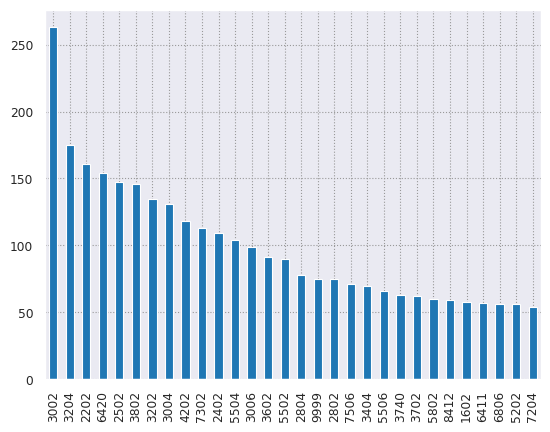

In [68]:
dfa['wweia_category_number'].value_counts()[:30].plot(kind='bar')


In [69]:
Q = dfa['wweia_category_number'].value_counts()
U = dfa['wweia_category_description'].value_counts()
T = dfa['main_food_description'].value_counts()
V = dfa['food_code'].value_counts()


In [70]:
print(Q.info(memory_usage='deep'))
print("****************")
print(U.info(memory_usage='deep'))
print('++++++++++++++++++++++++++++++')
print(T.info(memory_usage='deep'))
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print(V.info(memory_usage='deep'))



<class 'pandas.core.series.Series'>
Int64Index: 169 entries, 3002 to 9602
Series name: wweia_category_number
Non-Null Count  Dtype
--------------  -----
169 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB
None
****************
<class 'pandas.core.series.Series'>
Index: 169 entries, Meat mixed dishes to Human milk
Series name: wweia_category_description
Non-Null Count  Dtype
--------------  -----
169 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB
None
++++++++++++++++++++++++++++++
<class 'pandas.core.series.Series'>
Index: 5624 entries, Milk, human to Industrial oil as ingredient in food
Series name: main_food_description
Non-Null Count  Dtype
--------------  -----
5624 non-null   int64
dtypes: int64(1)
memory usage: 557.2 KB
None
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
<class 'pandas.core.series.Series'>
Int64Index: 5624 entries, 11000000 to 99998210
Series name: food_code
Non-Null Count  Dtype
--------------  -----
5624 non-null   int64
dtypes: int64(1)
memory usage: 87.9 KB

In [71]:
df_food_category = dfa.groupby(['wweia_category_number', 'wweia_category_description']).sum()
df_food_category.drop(columns=['food_code'], inplace=True)
df_food_category.head()

<ipython-input-71-3ac9de30bdee>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,,energy_kcal,protein_g,carbohydrate_g,sugars_totalg,fiber_total_dietary_g,total_fat_g,fatty_acids_total_saturated_g,fatty_acids_total_monounsaturated_g,fatty_acids_total_polyunsaturated_g,cholesterol_mg,retinol_mcg,vitamin_a_rae_mcgrae,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lycopene_mcg,lutein__zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b6_mg,folic_acid_mcg,folate_food_mcg,folate_dfe_mcgdfe,folate_total_mcg,choline_total_mg,vitamin_b12_mcg,vitamin_b12_addedmcg,vitamin_c_mg,vitamin_d_d2__d3_mcg,vitamin_e_alphatocopherol_mg,vitamin_e_addedmg,vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,ironmg,zincmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,waterg
wweia_category_number,wweia_category_description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1002,"Milk, whole",597,30.94,44.53,44.89,0.0,33.05,20.022,9.191,1.154,119,331,337,0,60,0,0,0,0.344,1.402,1.064,0.350,0,28,28,28,148.0,2.43,0.0,6.4,10.4,0.61,0.0,2.5,1159,922,110,0.53,3.58,0.126,16.0,1448,503,0,0,0.0,584.26
1004,"Milk, reduced fat",244,17.47,25.78,25.81,0.0,7.90,4.683,1.827,0.257,33,353,355,0,13,0,0,0,0.219,0.715,0.505,0.237,0,14,14,14,79.4,1.90,0.0,1.7,5.3,0.14,0.0,0.8,662,501,63,0.28,2.17,0.019,8.0,800,230,0,0,0.0,345.12
1006,"Milk, lowfat",178,13.52,22.39,21.38,0.0,3.87,2.365,0.997,0.149,19,355,355,0,6,0,0,0,0.180,0.588,0.437,0.211,0,26,26,26,65.0,1.87,0.0,1.4,4.2,0.11,0.0,0.9,489,391,47,0.07,1.68,0.024,10.2,634,167,0,0,0.0,357.14
1008,"Milk, nonfat",250,24.12,35.18,35.44,0.0,1.57,0.967,0.386,0.057,18,318,319,0,5,0,0,0,0.265,0.999,0.636,0.269,0,26,26,26,109.3,2.34,0.0,3.4,5.2,0.05,0.0,0.1,898,670,84,0.40,2.96,0.057,13.3,1135,447,0,0,0.0,533.81
1202,"Flavored milk, whole",1067,37.87,148.68,139.23,2.9,36.57,21.820,8.682,1.266,130,323,333,0,72,0,0,3,0.564,1.794,1.379,0.682,0,19,19,19,247.3,4.76,0.0,6.9,9.5,0.63,0.0,3.4,1403,1235,180,1.28,5.94,0.443,33.2,2054,693,10,250,0.0,766.73


In [72]:
df_food_category.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 169 entries, (1002, 'Milk, whole') to (9999, 'Not included in a food category')
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   energy_kcal                          169 non-null    int64  
 1   protein_g                            169 non-null    float64
 2   carbohydrate_g                       169 non-null    float64
 3   sugars_totalg                        169 non-null    float64
 4   fiber_total_dietary_g                169 non-null    float64
 5   total_fat_g                          169 non-null    float64
 6   fatty_acids_total_saturated_g        169 non-null    float64
 7   fatty_acids_total_monounsaturated_g  169 non-null    float64
 8   fatty_acids_total_polyunsaturated_g  169 non-null    float64
 9   cholesterol_mg                       169 non-null    int64  
 10  retinol_mcg                          169

In [73]:
B = dfa['wweia_category_description'].value_counts()
b_df = pd.DataFrame(B)
#b_df.columns = ['wweia_category_number', 'count']
b_df = b_df.reset_index()
b_df.columns = ['wweia_category_description', 'count']
b_df.head(10)




,wweia_category_description,count
0,Meat mixed dishes,263
1,"Pasta mixed dishes, excludes macaroni and cheese",175
2,"Chicken, whole pieces",161
3,Other vegetables and combinations,154
4,Eggs and omelets,147
5,Soups,146
6,Rice mixed dishes,135
7,Poultry mixed dishes,131
8,Yeast breads,118
9,Coffee,113


In [74]:
import plotly.express as px

fig = px.bar(b_df[:30], y='count', x='wweia_category_description', text_auto='.2s',
            title="Default: various text sizes, positions and angles", height=1000)
fig.show()

In [75]:
dfa_3002 = dfa.query('`wweia_category_number` == 3002')
dfa_3002 = dfa_3002.reset_index(drop=True)
dfa_3002.head()


,food_code,main_food_description,wweia_category_number,wweia_category_description,energy_kcal,protein_g,carbohydrate_g,sugars_totalg,fiber_total_dietary_g,total_fat_g,fatty_acids_total_saturated_g,fatty_acids_total_monounsaturated_g,fatty_acids_total_polyunsaturated_g,cholesterol_mg,retinol_mcg,vitamin_a_rae_mcgrae,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lycopene_mcg,lutein__zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b6_mg,folic_acid_mcg,folate_food_mcg,folate_dfe_mcgdfe,folate_total_mcg,choline_total_mg,vitamin_b12_mcg,vitamin_b12_addedmcg,vitamin_c_mg,vitamin_d_d2__d3_mcg,vitamin_e_alphatocopherol_mg,vitamin_e_addedmg,vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,ironmg,zincmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,waterg
0,22101330,"Pork, chop, stuffed",3002,Meat mixed dishes,190,18.37,7.82,0.00,1.0,9.04,2.668,3.855,1.685,46,27,28,0,21,0,0,0,0.448,0.163,5.778,0.411,32,3,57,35,57.4,0.41,0.0,0.3,0.4,0.43,0.0,3.1,15,174,22,0.73,1.34,0.073,40.6,293,414,0,0,0.0,62.96
1,27100100,"Barbecue meat, NFS",3002,Meat mixed dishes,226,18.14,12.23,9.97,0.3,11.17,4.020,4.934,1.394,65,2,6,0,40,1,1365,26,0.263,0.233,3.198,0.280,0,3,3,3,72.7,0.92,0.0,0.2,0.6,0.36,0.0,0.8,23,158,19,1.36,3.51,0.101,23.9,289,601,0,0,0.0,55.89
2,27111000,Beef with tomato-based sauce,3002,Meat mixed dishes,149,21.72,1.58,1.06,0.4,6.36,2.391,2.686,0.292,63,0,6,0,73,1,3940,7,0.056,0.132,4.014,0.308,0,9,9,9,84.0,1.19,0.0,2.0,0.1,0.73,0.0,1.9,9,142,18,2.05,3.69,0.086,22.3,264,363,0,0,0.0,68.76
3,27111100,Beef goulash,3002,Meat mixed dishes,104,13.70,2.93,1.07,0.4,3.79,0.922,1.534,0.810,35,0,5,0,58,4,1362,22,0.056,0.117,3.737,0.226,1,10,13,12,52.0,0.83,0.0,8.4,0.0,0.52,0.0,3.1,17,137,18,1.38,2.54,0.076,16.9,260,220,0,0,0.0,78.49
4,27111200,Beef burgundy,3002,Meat mixed dishes,148,18.48,4.20,1.45,0.7,6.00,1.776,2.449,0.968,52,0,1,0,16,0,193,11,0.065,0.212,4.454,0.239,1,16,18,17,70.6,1.27,0.0,2.0,0.1,0.57,0.0,6.3,20,184,23,1.85,4.52,0.143,22.8,369,369,0,0,0.0,69.90


In [76]:
dfa_3002['wweia_category_description'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 263 entries, 0 to 262
Series name: wweia_category_description
Non-Null Count  Dtype 
--------------  ----- 
263 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [77]:
dfa_3002 = dfa_3002.drop(columns=['wweia_category_description', 'wweia_category_number', 'food_code'])
dfa_3002.head()





,main_food_description,energy_kcal,protein_g,carbohydrate_g,sugars_totalg,fiber_total_dietary_g,total_fat_g,fatty_acids_total_saturated_g,fatty_acids_total_monounsaturated_g,fatty_acids_total_polyunsaturated_g,cholesterol_mg,retinol_mcg,vitamin_a_rae_mcgrae,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lycopene_mcg,lutein__zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b6_mg,folic_acid_mcg,folate_food_mcg,folate_dfe_mcgdfe,folate_total_mcg,choline_total_mg,vitamin_b12_mcg,vitamin_b12_addedmcg,vitamin_c_mg,vitamin_d_d2__d3_mcg,vitamin_e_alphatocopherol_mg,vitamin_e_addedmg,vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,ironmg,zincmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,waterg
0,"Pork, chop, stuffed",190,18.37,7.82,0.00,1.0,9.04,2.668,3.855,1.685,46,27,28,0,21,0,0,0,0.448,0.163,5.778,0.411,32,3,57,35,57.4,0.41,0.0,0.3,0.4,0.43,0.0,3.1,15,174,22,0.73,1.34,0.073,40.6,293,414,0,0,0.0,62.96
1,"Barbecue meat, NFS",226,18.14,12.23,9.97,0.3,11.17,4.020,4.934,1.394,65,2,6,0,40,1,1365,26,0.263,0.233,3.198,0.280,0,3,3,3,72.7,0.92,0.0,0.2,0.6,0.36,0.0,0.8,23,158,19,1.36,3.51,0.101,23.9,289,601,0,0,0.0,55.89
2,Beef with tomato-based sauce,149,21.72,1.58,1.06,0.4,6.36,2.391,2.686,0.292,63,0,6,0,73,1,3940,7,0.056,0.132,4.014,0.308,0,9,9,9,84.0,1.19,0.0,2.0,0.1,0.73,0.0,1.9,9,142,18,2.05,3.69,0.086,22.3,264,363,0,0,0.0,68.76
3,Beef goulash,104,13.70,2.93,1.07,0.4,3.79,0.922,1.534,0.810,35,0,5,0,58,4,1362,22,0.056,0.117,3.737,0.226,1,10,13,12,52.0,0.83,0.0,8.4,0.0,0.52,0.0,3.1,17,137,18,1.38,2.54,0.076,16.9,260,220,0,0,0.0,78.49
4,Beef burgundy,148,18.48,4.20,1.45,0.7,6.00,1.776,2.449,0.968,52,0,1,0,16,0,193,11,0.065,0.212,4.454,0.239,1,16,18,17,70.6,1.27,0.0,2.0,0.1,0.57,0.0,6.3,20,184,23,1.85,4.52,0.143,22.8,369,369,0,0,0.0,69.90


<Axes: xlabel='energy_kcal', ylabel='Count'>

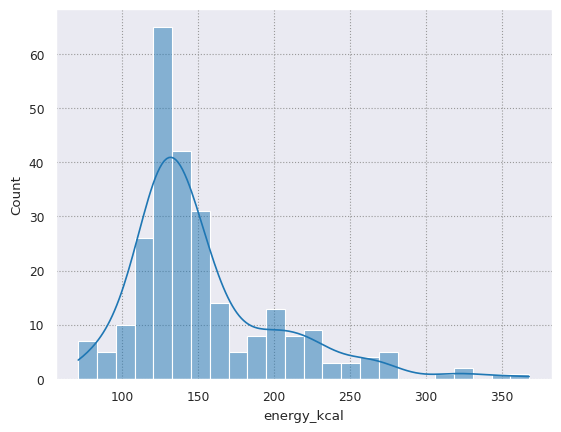

In [78]:
sns.histplot(data=dfa_3002, x='energy_kcal', kde=True)

#sns.histplot(data=dfa_3002, x='protein_g', bins=10, kde=True)

In [79]:
dfa_coffee = dfa.query('wweia_category_description == "Coffee"')
#dfa_coffee = dfa_coffee.reset_index(drop=True)
dfa_coffee.head()

,food_code,main_food_description,wweia_category_number,wweia_category_description,energy_kcal,protein_g,carbohydrate_g,sugars_totalg,fiber_total_dietary_g,total_fat_g,fatty_acids_total_saturated_g,fatty_acids_total_monounsaturated_g,fatty_acids_total_polyunsaturated_g,cholesterol_mg,retinol_mcg,vitamin_a_rae_mcgrae,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lycopene_mcg,lutein__zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b6_mg,folic_acid_mcg,folate_food_mcg,folate_dfe_mcgdfe,folate_total_mcg,choline_total_mg,vitamin_b12_mcg,vitamin_b12_addedmcg,vitamin_c_mg,vitamin_d_d2__d3_mcg,vitamin_e_alphatocopherol_mg,vitamin_e_addedmg,vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,ironmg,zincmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,waterg
5173,92100000,"Coffee, NS as to type",7302,Coffee,1,0.12,0.00,0.00,0.0,0.02,0.002,0.015,0.001,0,0,0,0,0,0,0,0,0.014,0.076,0.191,0.001,0,2,2,2,2.6,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,49,2,40,0,0.0,99.39
5174,92100500,"Coffee, NS as to brewed or instant",7302,Coffee,1,0.12,0.00,0.00,0.0,0.02,0.002,0.015,0.001,0,0,0,0,0,0,0,0,0.014,0.076,0.191,0.001,0,2,2,2,2.6,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,49,2,40,0,0.0,99.39
5175,92101000,"Coffee, brewed",7302,Coffee,1,0.12,0.00,0.00,0.0,0.02,0.002,0.015,0.001,0,0,0,0,0,0,0,0,0.014,0.076,0.191,0.001,0,2,2,2,2.6,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,49,2,40,0,0.0,99.39
5176,92101500,"Coffee, brewed, blend of regular and decaffein...",7302,Coffee,0,0.11,0.00,0.00,0.0,0.01,0.002,0.008,0.002,0,0,0,0,0,0,0,0,0.007,0.038,0.206,0.000,0,1,1,1,1.8,0.0,0.0,0.0,0.0,0.00,0.0,0.1,2,2,4,0.03,0.02,0.005,0.0,52,2,20,0,0.0,99.34
5177,92101600,"Coffee, Turkish",7302,Coffee,27,0.11,6.47,6.48,0.0,0.04,0.002,0.014,0.001,0,0,0,0,0,0,0,0,0.013,0.072,0.179,0.001,0,2,2,2,2.4,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,46,2,37,0,0.0,92.94


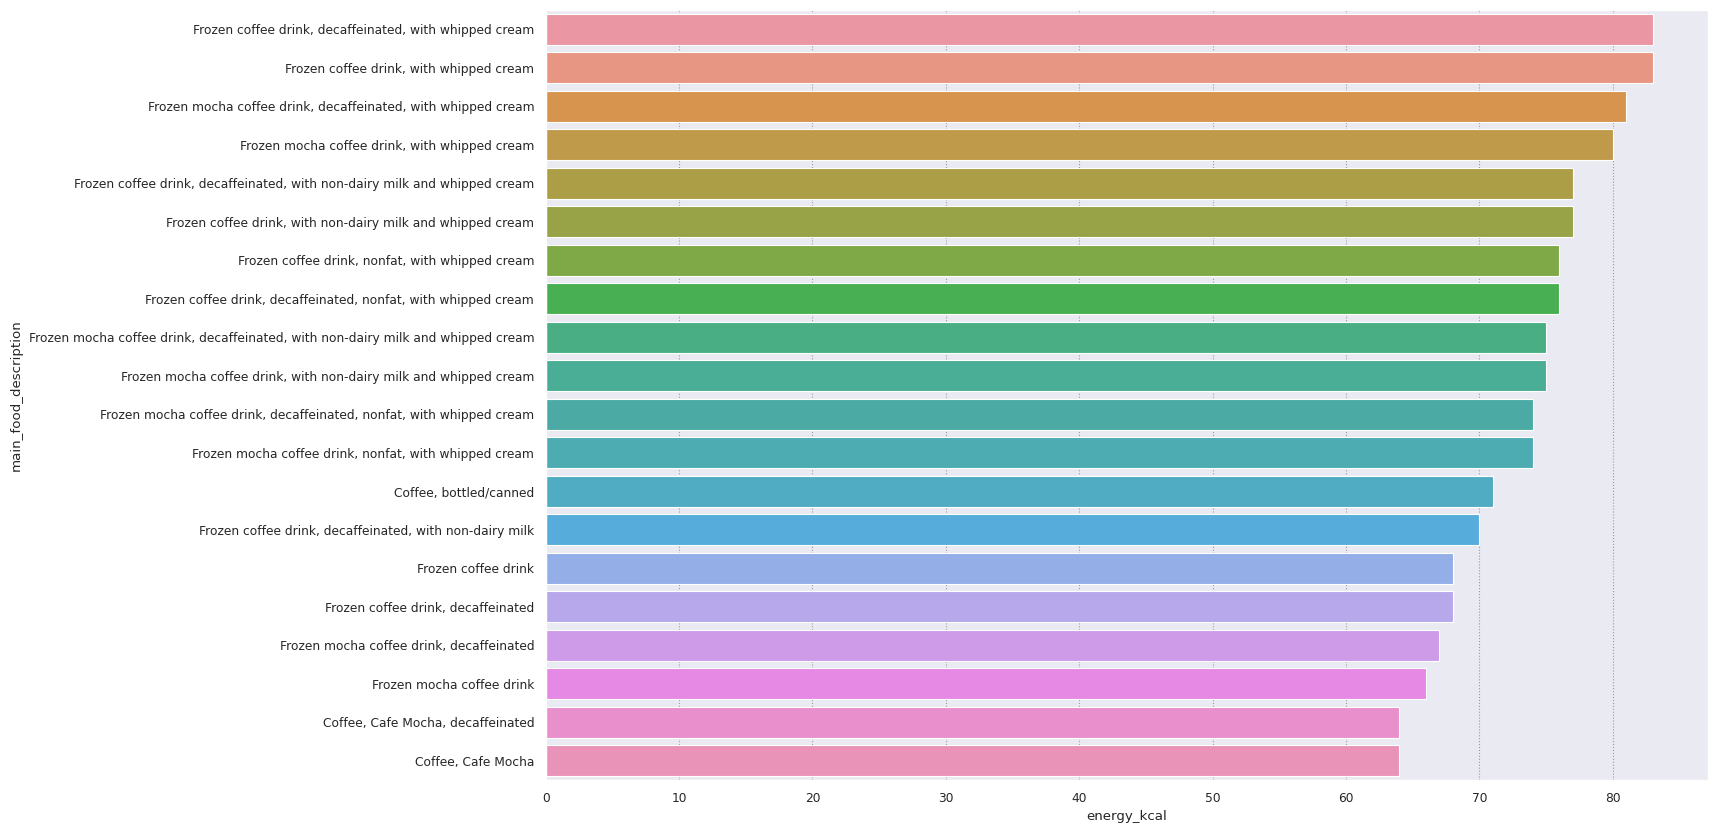

In [80]:
sns.set_context('paper')
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=dfa_coffee.sort_values('energy_kcal', ascending=False)[:20], y='main_food_description',x='energy_kcal')
plt.show()

<Axes: xlabel='protein_g', ylabel='Count'>

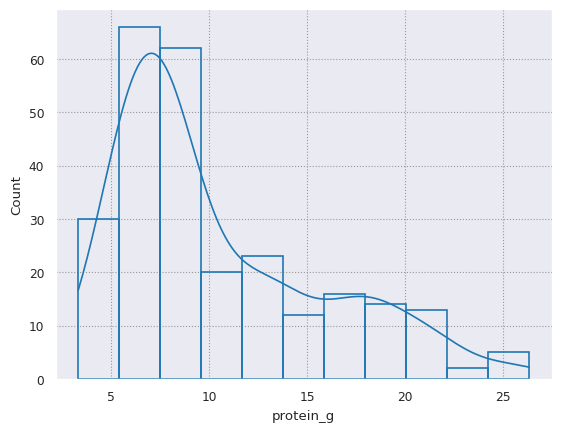

In [81]:
sns.histplot(data=dfa_3002, x='protein_g', kde=True, fill=False)



In [34]:
#dfa_3002['protein_g'].value_counts()#[:20].plot(kind='barh')




In [82]:
dfa_3204 = dfa.query('`wweia_category_number` == 3204')
dfa_3204 = dfa_3204.reset_index(drop=True)
dfa_3204.head()


,food_code,main_food_description,wweia_category_number,wweia_category_description,energy_kcal,protein_g,carbohydrate_g,sugars_totalg,fiber_total_dietary_g,total_fat_g,fatty_acids_total_saturated_g,fatty_acids_total_monounsaturated_g,fatty_acids_total_polyunsaturated_g,cholesterol_mg,retinol_mcg,vitamin_a_rae_mcgrae,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lycopene_mcg,lutein__zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b6_mg,folic_acid_mcg,folate_food_mcg,folate_dfe_mcgdfe,folate_total_mcg,choline_total_mg,vitamin_b12_mcg,vitamin_b12_addedmcg,vitamin_c_mg,vitamin_d_d2__d3_mcg,vitamin_e_alphatocopherol_mg,vitamin_e_addedmg,vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,ironmg,zincmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,waterg
0,58122210,"Gnocchi, cheese",3204,"Pasta mixed dishes, excludes macaroni and cheese",178,8.51,9.38,0.14,0.2,11.96,4.344,4.468,2.167,68,128,132,0,49,2,0,64,0.081,0.171,0.548,0.026,8,12,26,20,41.0,0.31,0.0,0.0,0.7,0.84,0.0,7.0,169,144,12,0.86,1.00,0.030,13.3,83,263,0,0,0.0,68.83
1,58122220,"Gnocchi, potato",3204,"Pasta mixed dishes, excludes macaroni and cheese",135,2.44,17.20,0.99,1.0,6.33,3.420,1.269,0.259,18,60,62,0,27,4,0,15,0.129,0.074,1.210,0.102,12,5,26,17,9.1,0.06,0.0,1.9,0.2,0.03,0.0,1.3,22,41,12,0.83,0.24,0.074,2.3,139,279,0,0,0.0,72.94
2,58130011,Lasagna with meat,3204,"Pasta mixed dishes, excludes macaroni and cheese",139,7.45,16.17,3.33,1.6,4.97,2.322,1.798,0.402,16,20,42,8,249,2,3764,197,0.056,0.056,1.602,0.139,12,3,23,15,17.2,0.83,0.0,4.4,0.0,0.98,0.0,6.6,82,115,20,0.73,0.89,0.097,16.6,207,390,0,0,0.0,69.78
3,58130013,"Lasagna with meat, canned",3204,"Pasta mixed dishes, excludes macaroni and cheese",97,3.24,13.26,1.97,1.5,3.41,1.460,1.617,0.237,5,4,14,1,121,0,3335,65,0.057,0.057,1.245,0.055,10,11,28,21,12.5,0.15,0.0,0.0,0.0,0.50,0.0,0.8,12,40,12,1.09,0.39,0.053,9.6,178,283,0,0,0.0,79.12
4,58130014,"Lasagna with meat, from restaurant",3204,"Pasta mixed dishes, excludes macaroni and cheese",185,10.83,11.36,3.15,1.5,10.69,4.941,3.313,0.788,36,64,81,9,197,0,2517,97,0.140,0.237,1.843,0.122,17,8,38,26,33.5,0.66,0.0,0.7,0.0,0.91,0.0,6.8,197,178,22,0.79,1.32,0.070,18.0,255,466,0,0,0.0,64.87


In [83]:
dfa_3204['main_food_description'].value_counts()


Gnocchi, cheese                                                                            1
Pasta, whole grain, with tomato-based sauce, poultry, and added vegetables, home recipe    1
Pasta, whole grain, with tomato-based sauce and meat, ready-to-heat                        1
Pasta, whole grain, with tomato-based sauce, meat, and added vegetables, restaurant        1
Pasta, whole grain, with tomato-based sauce, meat, and added vegetables, home recipe       1
                                                                                          ..
Pasta with tomato-based sauce, and added vegetables, ready-to-heat                         1
Pasta with sauce and meat, from school lunch                                               1
Pasta with tomato-based sauce and meat, restaurant                                         1
Pasta with tomato-based sauce and meat, home recipe                                        1
Spaghetti with meat sauce, diet frozen meal                           

In [84]:
dfa['wweia_category_description'].value_counts()


Meat mixed dishes                                   263
Pasta mixed dishes, excludes macaroni and cheese    175
Chicken, whole pieces                               161
Other vegetables and combinations                   154
Eggs and omelets                                    147
                                                   ... 
Enhanced water                                        2
Bottled water                                         1
Baby water                                            1
Grapes                                                1
Human milk                                            1
Name: wweia_category_description, Length: 169, dtype: int64

In [85]:
dfa_3204.shape

(175, 50)

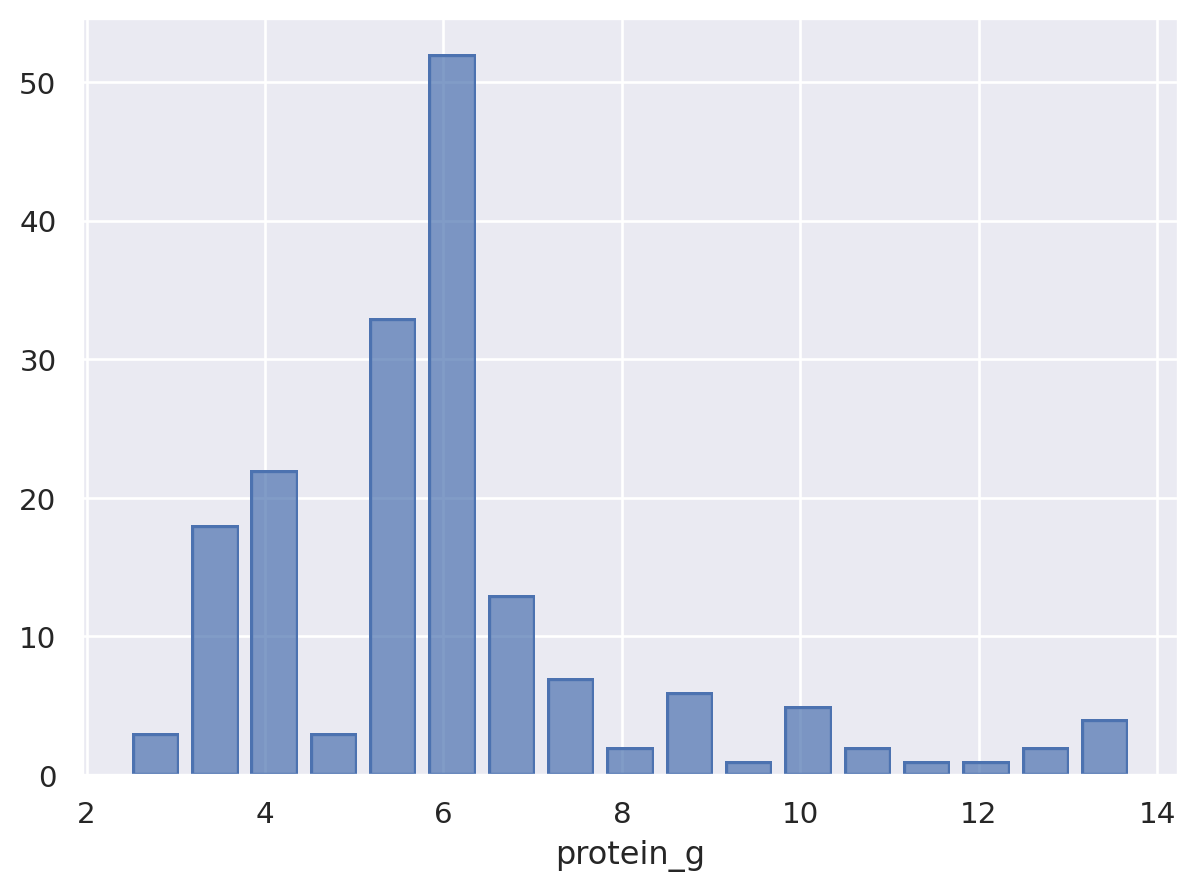

In [86]:
import seaborn.objects as so
so.Plot(dfa_3204, "protein_g").add(so.Bar(), so.Hist())

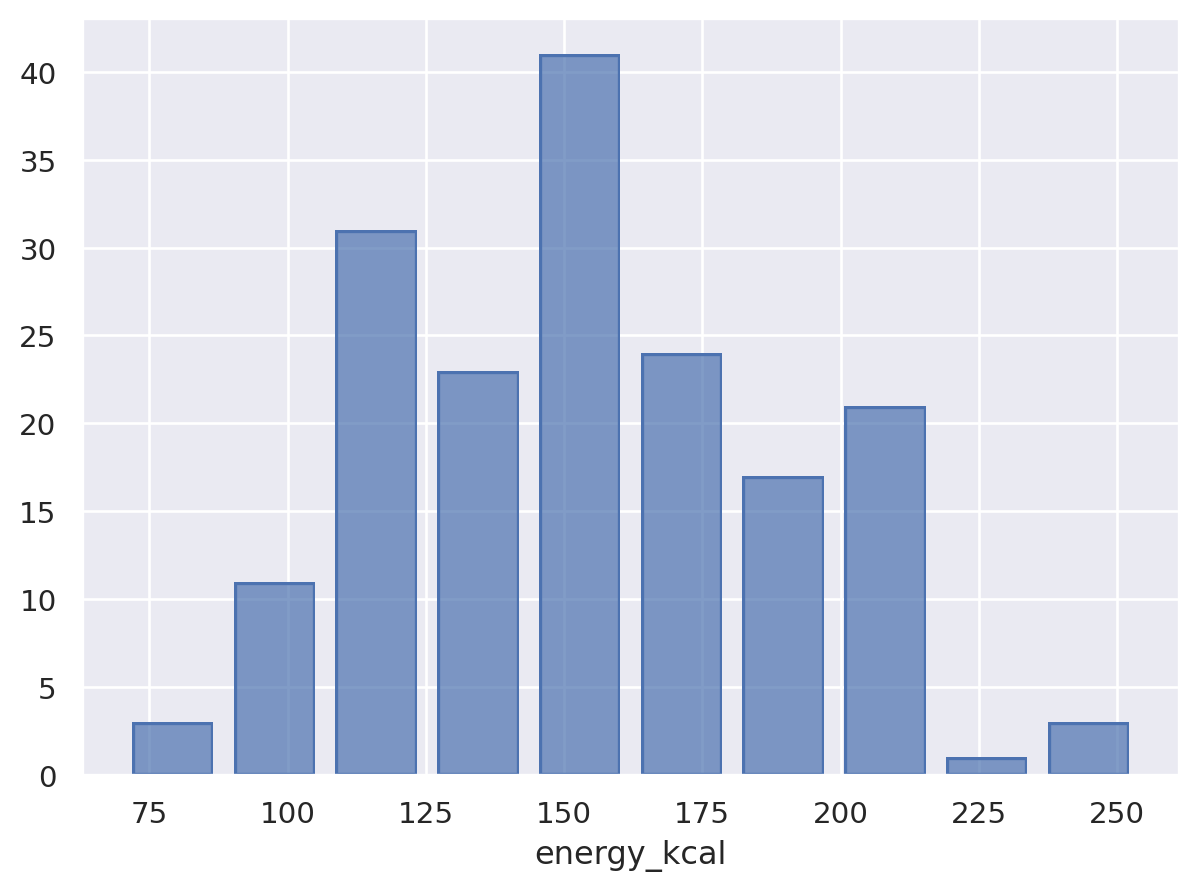

In [87]:
import seaborn.objects as so
so.Plot(dfa_3204, "energy_kcal").add(so.Bar(), so.Hist())

In [88]:
dfa_coffee = dfa.query('wweia_category_description == "Coffee"')
#dfa_coffee = dfa_coffee.reset_index(drop=True)
dfa_coffee.head()

,food_code,main_food_description,wweia_category_number,wweia_category_description,energy_kcal,protein_g,carbohydrate_g,sugars_totalg,fiber_total_dietary_g,total_fat_g,fatty_acids_total_saturated_g,fatty_acids_total_monounsaturated_g,fatty_acids_total_polyunsaturated_g,cholesterol_mg,retinol_mcg,vitamin_a_rae_mcgrae,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lycopene_mcg,lutein__zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b6_mg,folic_acid_mcg,folate_food_mcg,folate_dfe_mcgdfe,folate_total_mcg,choline_total_mg,vitamin_b12_mcg,vitamin_b12_addedmcg,vitamin_c_mg,vitamin_d_d2__d3_mcg,vitamin_e_alphatocopherol_mg,vitamin_e_addedmg,vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,ironmg,zincmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,waterg
5173,92100000,"Coffee, NS as to type",7302,Coffee,1,0.12,0.00,0.00,0.0,0.02,0.002,0.015,0.001,0,0,0,0,0,0,0,0,0.014,0.076,0.191,0.001,0,2,2,2,2.6,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,49,2,40,0,0.0,99.39
5174,92100500,"Coffee, NS as to brewed or instant",7302,Coffee,1,0.12,0.00,0.00,0.0,0.02,0.002,0.015,0.001,0,0,0,0,0,0,0,0,0.014,0.076,0.191,0.001,0,2,2,2,2.6,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,49,2,40,0,0.0,99.39
5175,92101000,"Coffee, brewed",7302,Coffee,1,0.12,0.00,0.00,0.0,0.02,0.002,0.015,0.001,0,0,0,0,0,0,0,0,0.014,0.076,0.191,0.001,0,2,2,2,2.6,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,49,2,40,0,0.0,99.39
5176,92101500,"Coffee, brewed, blend of regular and decaffein...",7302,Coffee,0,0.11,0.00,0.00,0.0,0.01,0.002,0.008,0.002,0,0,0,0,0,0,0,0,0.007,0.038,0.206,0.000,0,1,1,1,1.8,0.0,0.0,0.0,0.0,0.00,0.0,0.1,2,2,4,0.03,0.02,0.005,0.0,52,2,20,0,0.0,99.34
5177,92101600,"Coffee, Turkish",7302,Coffee,27,0.11,6.47,6.48,0.0,0.04,0.002,0.014,0.001,0,0,0,0,0,0,0,0,0.013,0.072,0.179,0.001,0,2,2,2,2.4,0.0,0.0,0.0,0.0,0.01,0.0,0.1,2,3,3,0.01,0.02,0.002,0.0,46,2,37,0,0.0,92.94


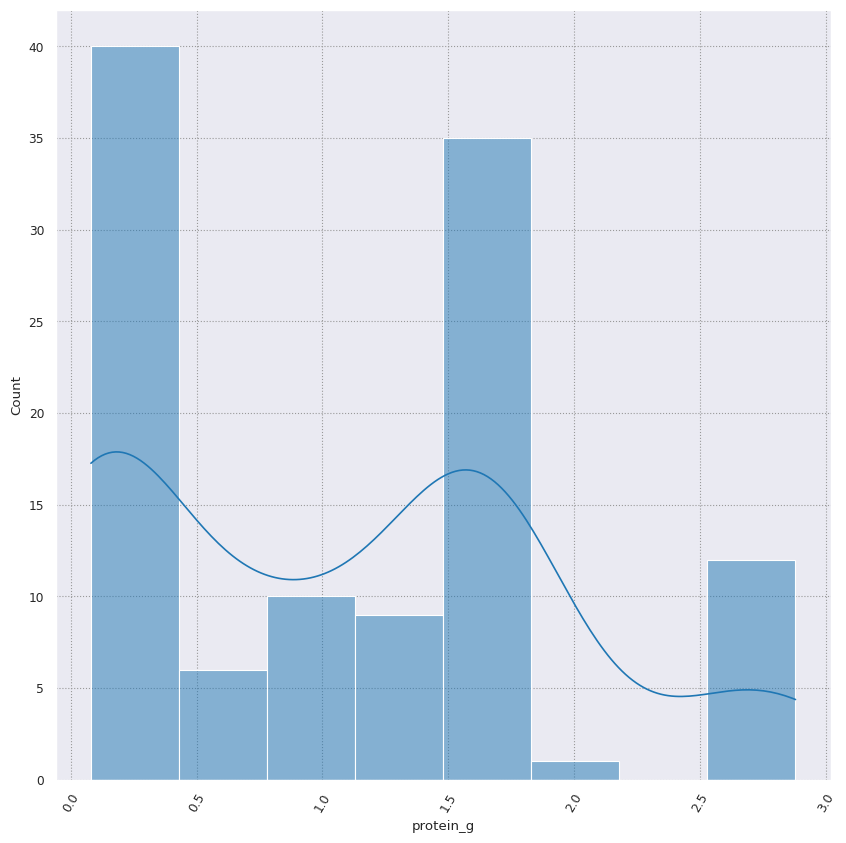

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.histplot(data=dfa_coffee, x='protein_g',kde=True)
sns.color_palette("flare")
plt.setp(ax.get_xticklabels(), rotation=60)
plt.show()



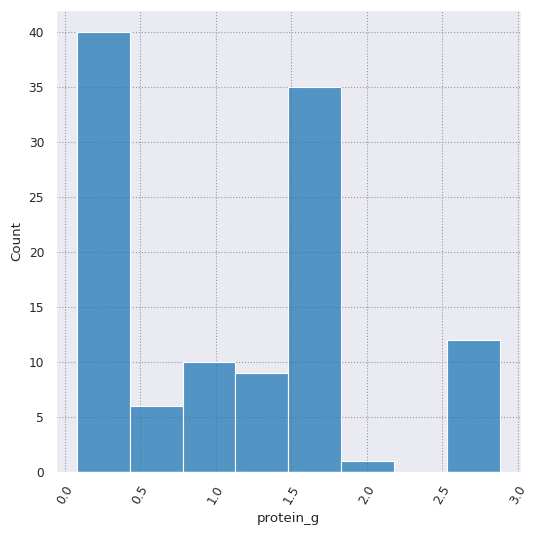

In [90]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.histplot(data=dfa_coffee, x='protein_g')
sns.color_palette("flare")
plt.setp(ax.get_xticklabels(), rotation=60)
plt.show()


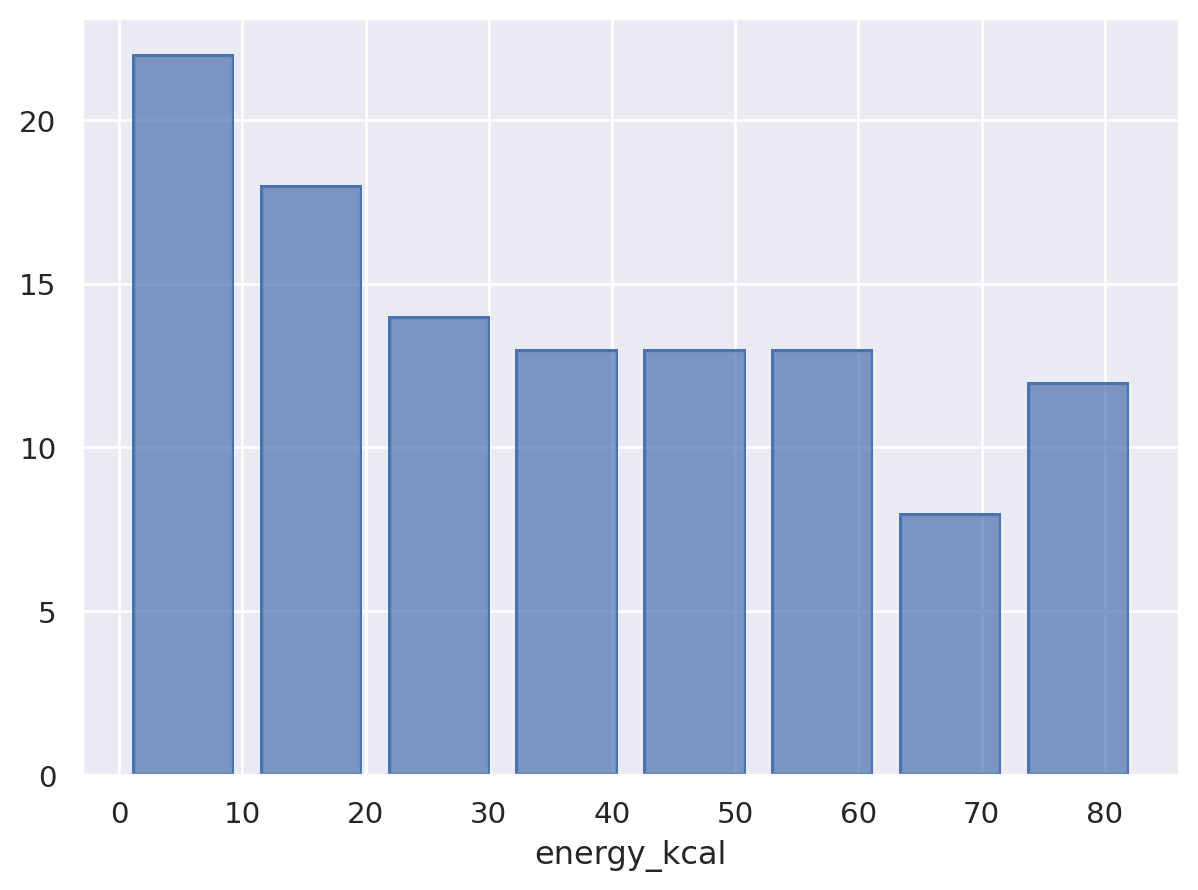

In [91]:
#sns.histplot(data=dfa_coffee, x='energy_kcal', bins=5, kde=True)
import seaborn.objects as so
so.Plot(dfa_coffee, "energy_kcal").add(so.Bar(), so.Hist())





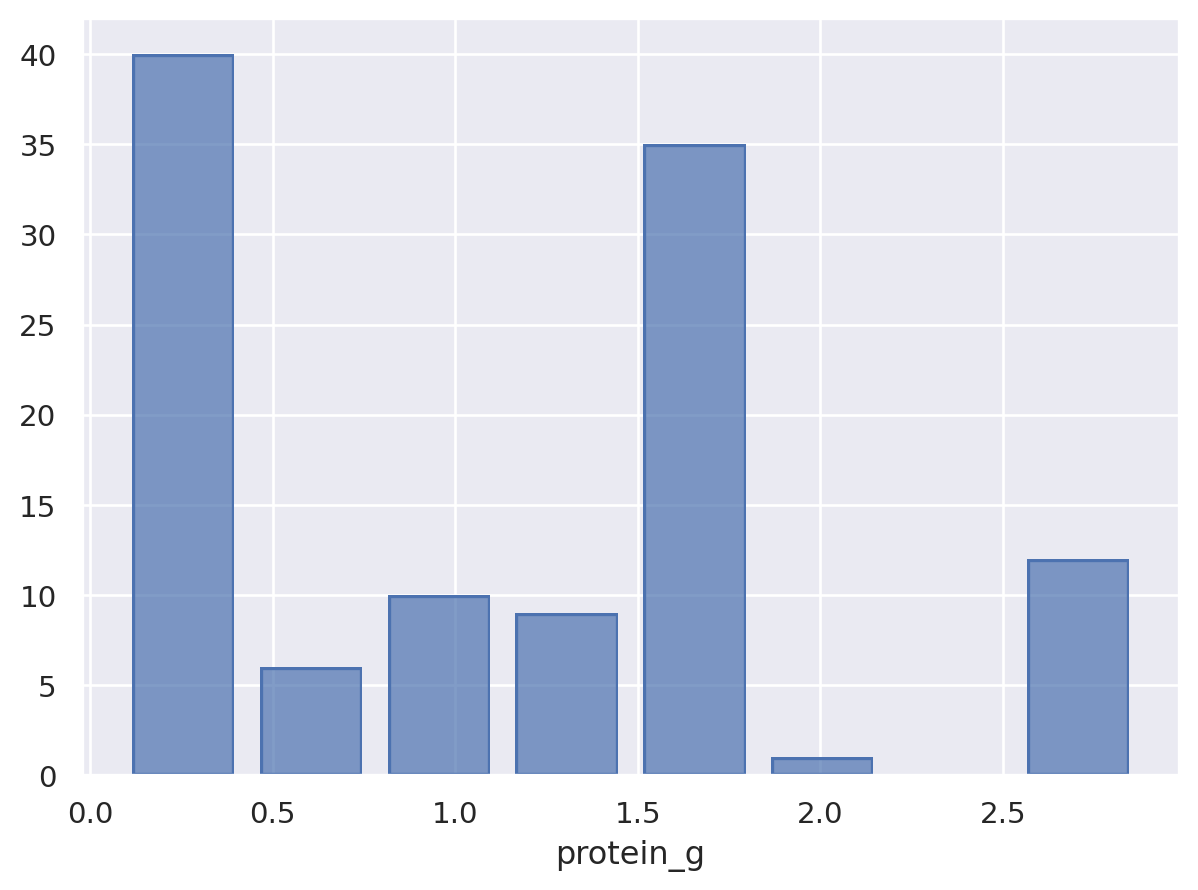

In [92]:
import seaborn.objects as so
so.Plot(dfa_coffee, "protein_g").add(so.Bar(), so.Hist())


In [93]:
dfa_pineapple = dfa.query('wweia_category_description == "Fruit drinks"')
#dfa_coffee = dfa_coffee.reset_index(drop=True)
dfa_pineapple.head()


,food_code,main_food_description,wweia_category_number,wweia_category_description,energy_kcal,protein_g,carbohydrate_g,sugars_totalg,fiber_total_dietary_g,total_fat_g,fatty_acids_total_saturated_g,fatty_acids_total_monounsaturated_g,fatty_acids_total_polyunsaturated_g,cholesterol_mg,retinol_mcg,vitamin_a_rae_mcgrae,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lycopene_mcg,lutein__zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b6_mg,folic_acid_mcg,folate_food_mcg,folate_dfe_mcgdfe,folate_total_mcg,choline_total_mg,vitamin_b12_mcg,vitamin_b12_addedmcg,vitamin_c_mg,vitamin_d_d2__d3_mcg,vitamin_e_alphatocopherol_mg,vitamin_e_addedmg,vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,ironmg,zincmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,waterg
2287,42403010,"Coconut water, unsweetened",7204,Fruit drinks,18,0.22,4.24,3.92,0.0,0.00,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0.030,0.000,0.000,0.000,0,0,0,0,0.0,0.0,0.0,9.9,0.0,0.00,0.0,0.0,7,5,6,0.03,0.02,0.008,0.0,165,26,0,0,0.0,95.03
2288,42404010,"Coconut water, sweetened",7204,Fruit drinks,37,0.21,9.07,8.78,0.0,0.02,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0.028,0.001,0.000,0.000,0,0,0,0,0.0,0.0,0.0,9.4,0.0,0.00,0.0,0.0,7,5,6,0.03,0.02,0.008,0.0,157,25,0,0,0.0,90.22
4074,64200100,"Fruit nectar, NFS",7204,Fruit drinks,51,0.11,13.12,12.45,0.3,0.06,0.014,0.022,0.011,0,0,35,0,402,26,0,0,0.003,0.003,0.080,0.015,0,7,7,7,1.5,0.0,0.0,15.2,0.0,0.21,0.0,0.8,17,2,3,0.36,0.02,0.015,0.4,24,5,0,0,0.0,86.63
4075,64201010,Apricot nectar,7204,Fruit drinks,56,0.17,13.63,12.79,0.1,0.45,0.033,0.186,0.087,0,0,16,3,189,5,20,6,0.060,0.015,0.150,0.037,0,1,1,1,1.0,0.0,0.0,29.7,0.0,0.41,0.0,1.2,11,5,5,0.10,0.03,0.019,0.0,67,8,0,0,0.0,85.63
4076,64201500,Banana nectar,7204,Fruit drinks,74,0.26,18.01,15.51,0.6,0.13,0.039,0.011,0.026,0,0,0,2,3,0,0,8,0.020,0.002,0.232,0.073,0,5,5,5,3.4,0.0,0.0,4.3,0.0,0.04,0.0,0.0,4,8,10,0.00,0.06,0.041,0.1,115,2,0,0,0.0,81.30


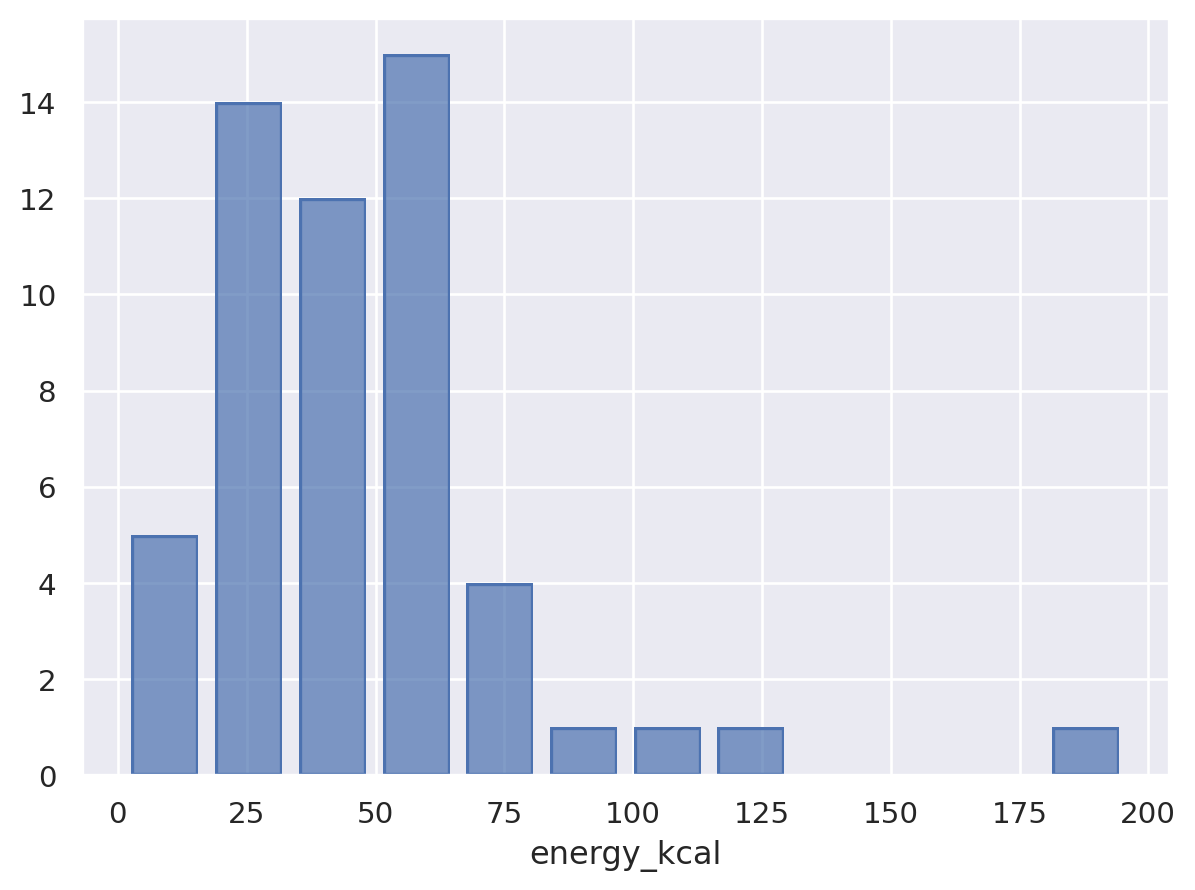

In [94]:
import seaborn.objects as so
so.Plot(dfa_pineapple, "energy_kcal").add(so.Bar(), so.Hist())

In [95]:
dfa_pineapple.drop(columns=['food_code', 'wweia_category_number', 'wweia_category_description'], axis=1, inplace=True)
dfa_pineapple.set_index('main_food_description', inplace=True)
dfa_pineapple.head()


<ipython-input-95-60004e506813>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,energy_kcal,protein_g,carbohydrate_g,sugars_totalg,fiber_total_dietary_g,total_fat_g,fatty_acids_total_saturated_g,fatty_acids_total_monounsaturated_g,fatty_acids_total_polyunsaturated_g,cholesterol_mg,retinol_mcg,vitamin_a_rae_mcgrae,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lycopene_mcg,lutein__zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b6_mg,folic_acid_mcg,folate_food_mcg,folate_dfe_mcgdfe,folate_total_mcg,choline_total_mg,vitamin_b12_mcg,vitamin_b12_addedmcg,vitamin_c_mg,vitamin_d_d2__d3_mcg,vitamin_e_alphatocopherol_mg,vitamin_e_addedmg,vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,ironmg,zincmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,waterg
main_food_description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Coconut water, unsweetened",18,0.22,4.24,3.92,0.0,0.00,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0.030,0.000,0.000,0.000,0,0,0,0,0.0,0.0,0.0,9.9,0.0,0.00,0.0,0.0,7,5,6,0.03,0.02,0.008,0.0,165,26,0,0,0.0,95.03
"Coconut water, sweetened",37,0.21,9.07,8.78,0.0,0.02,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0.028,0.001,0.000,0.000,0,0,0,0,0.0,0.0,0.0,9.4,0.0,0.00,0.0,0.0,7,5,6,0.03,0.02,0.008,0.0,157,25,0,0,0.0,90.22
"Fruit nectar, NFS",51,0.11,13.12,12.45,0.3,0.06,0.014,0.022,0.011,0,0,35,0,402,26,0,0,0.003,0.003,0.080,0.015,0,7,7,7,1.5,0.0,0.0,15.2,0.0,0.21,0.0,0.8,17,2,3,0.36,0.02,0.015,0.4,24,5,0,0,0.0,86.63
Apricot nectar,56,0.17,13.63,12.79,0.1,0.45,0.033,0.186,0.087,0,0,16,3,189,5,20,6,0.060,0.015,0.150,0.037,0,1,1,1,1.0,0.0,0.0,29.7,0.0,0.41,0.0,1.2,11,5,5,0.10,0.03,0.019,0.0,67,8,0,0,0.0,85.63
Banana nectar,74,0.26,18.01,15.51,0.6,0.13,0.039,0.011,0.026,0,0,0,2,3,0,0,8,0.020,0.002,0.232,0.073,0,5,5,5,3.4,0.0,0.0,4.3,0.0,0.04,0.0,0.0,4,8,10,0.00,0.06,0.041,0.1,115,2,0,0,0.0,81.30


In [96]:
dfa_pineapple.reset_index(inplace=True)
dfa_pineapple.head()


,main_food_description,energy_kcal,protein_g,carbohydrate_g,sugars_totalg,fiber_total_dietary_g,total_fat_g,fatty_acids_total_saturated_g,fatty_acids_total_monounsaturated_g,fatty_acids_total_polyunsaturated_g,cholesterol_mg,retinol_mcg,vitamin_a_rae_mcgrae,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lycopene_mcg,lutein__zeaxanthin_mcg,thiamin_mg,riboflavin_mg,niacin_mg,vitamin_b6_mg,folic_acid_mcg,folate_food_mcg,folate_dfe_mcgdfe,folate_total_mcg,choline_total_mg,vitamin_b12_mcg,vitamin_b12_addedmcg,vitamin_c_mg,vitamin_d_d2__d3_mcg,vitamin_e_alphatocopherol_mg,vitamin_e_addedmg,vitamin_k_phylloquinone_mcg,calcium_mg,phosphorus_mg,magnesium_mg,ironmg,zincmg,copper_mg,selenium_mcg,potassium_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,waterg
0,"Coconut water, unsweetened",18,0.22,4.24,3.92,0.0,0.00,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0.030,0.000,0.000,0.000,0,0,0,0,0.0,0.0,0.0,9.9,0.0,0.00,0.0,0.0,7,5,6,0.03,0.02,0.008,0.0,165,26,0,0,0.0,95.03
1,"Coconut water, sweetened",37,0.21,9.07,8.78,0.0,0.02,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0.028,0.001,0.000,0.000,0,0,0,0,0.0,0.0,0.0,9.4,0.0,0.00,0.0,0.0,7,5,6,0.03,0.02,0.008,0.0,157,25,0,0,0.0,90.22
2,"Fruit nectar, NFS",51,0.11,13.12,12.45,0.3,0.06,0.014,0.022,0.011,0,0,35,0,402,26,0,0,0.003,0.003,0.080,0.015,0,7,7,7,1.5,0.0,0.0,15.2,0.0,0.21,0.0,0.8,17,2,3,0.36,0.02,0.015,0.4,24,5,0,0,0.0,86.63
3,Apricot nectar,56,0.17,13.63,12.79,0.1,0.45,0.033,0.186,0.087,0,0,16,3,189,5,20,6,0.060,0.015,0.150,0.037,0,1,1,1,1.0,0.0,0.0,29.7,0.0,0.41,0.0,1.2,11,5,5,0.10,0.03,0.019,0.0,67,8,0,0,0.0,85.63
4,Banana nectar,74,0.26,18.01,15.51,0.6,0.13,0.039,0.011,0.026,0,0,0,2,3,0,0,8,0.020,0.002,0.232,0.073,0,5,5,5,3.4,0.0,0.0,4.3,0.0,0.04,0.0,0.0,4,8,10,0.00,0.06,0.041,0.1,115,2,0,0,0.0,81.30


In [97]:
print(*dfa_pineapple.columns)


main_food_description energy_kcal protein_g carbohydrate_g sugars_totalg fiber_total_dietary_g total_fat_g fatty_acids_total_saturated_g fatty_acids_total_monounsaturated_g fatty_acids_total_polyunsaturated_g cholesterol_mg retinol_mcg vitamin_a_rae_mcgrae carotene_alpha_mcg carotene_beta_mcg cryptoxanthin_beta_mcg lycopene_mcg lutein__zeaxanthin_mcg thiamin_mg riboflavin_mg niacin_mg vitamin_b6_mg folic_acid_mcg folate_food_mcg folate_dfe_mcgdfe folate_total_mcg choline_total_mg vitamin_b12_mcg vitamin_b12_addedmcg vitamin_c_mg vitamin_d_d2__d3_mcg vitamin_e_alphatocopherol_mg vitamin_e_addedmg vitamin_k_phylloquinone_mcg calcium_mg phosphorus_mg magnesium_mg ironmg zincmg copper_mg selenium_mcg potassium_mg sodium_mg caffeine_mg theobromine_mg alcohol_g waterg


In [98]:
fig = px.parallel_categories(dfa_pineapple,
                             dimensions=["main_food_description","sugars_totalg", "potassium_mg", "carbohydrate_g", "waterg", "energy_kcal"],
                             color='energy_kcal',
                             color_continuous_scale= px.colors.sequential.Rainbow
                            #  labels={"batch_size": "Batch Größe",
                            #          "out_channels": "n",
                            #          "num_layers": "Sequenzlänge L",
                            #          "aggr": "Aggregatsfunktion",
                            #          "bias": "Bias",
                            #          "binned_" + continous_col: "TPR"}
                )
fig.show()